# Neural Net testing

In [1]:
import numpy as np                                                              
import matplotlib.pyplot as plt

import neuralNet as nn
import utils as u

## One variable function testing

In [2]:
testFunc = lambda x: np.sum(np.atleast_2d(x), axis=1) % 2

n_max = 1024
nDigs = len(bin(n_max)[2:])
inputs = np.array([[int(i) for i in list(bin(x)[2:].zfill(nDigs))] for x in range(n_max)])
outputs = testFunc(inputs)

sizes = [nDigs, 100, 1]

model = nn.NeuralNet(sizes, **nn.losses['log'], **nn.activations['sigmoid'])

it, E_ins = model.learn(inputs, outputs, maxIters=100, trackE_in=True)

/Users/akshayyeluri/anaconda3/envs/neural/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


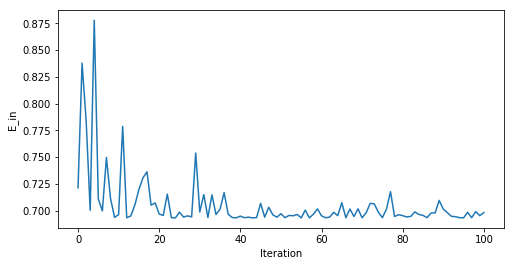

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

u.plotE_ins(E_ins, axis=ax)
#model.quickPlot(inputs, outputs, axis=ax[1])

fig.show()

outputs2 = np.round(np.array([model.calculate(i) for i in inputs]))

In [4]:
testFunc = lambda x: np.sin(2 * x)

inputs = np.linspace(-np.pi, np.pi, 200)
outputs = testFunc(inputs)

sizes = [1, 100, 100, 1]

## For cosine, need different nonlinearity
#model = nn.NeuralNet(sizes, **nn.activations['sigmoid'])
model = nn.NeuralNet(sizes, **nn.activations['tanh'])

it, E_ins = model.learn(inputs, outputs, maxIters=1000, trackE_in=True)

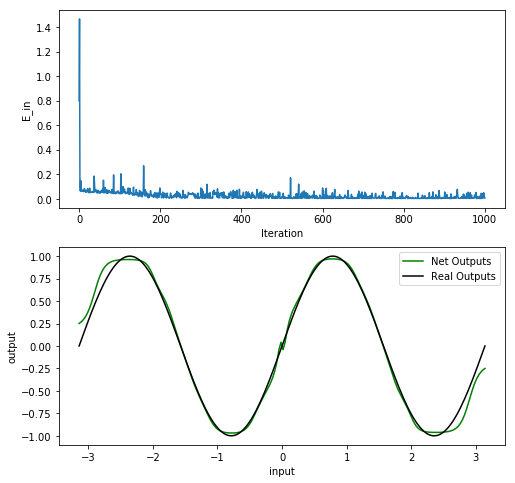

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

u.plotE_ins(E_ins, axis=ax[0])
model.quickPlot(inputs, outputs, axis=ax[1])

fig.show()

In [6]:
inputs = np.random.uniform(-np.pi, np.pi, 20)
outputs = testFunc(inputs)

outputs2 = np.array([model.calculate(i) for i in inputs])
outputs2 - outputs

array([-0.13006622,  0.03784275, -0.02554633,  0.15226508, -0.01181687,
        0.02758442,  0.17406685, -0.01800798, -0.18013869,  0.06586359,
        0.03821363,  0.0116984 , -0.03079184, -0.05687511, -0.23562858,
       -0.14468014,  0.00133171, -0.01038724, -0.10977199, -0.10261059])

## Multi-Variable Function Testing

In [7]:
testFunc = lambda x, y: np.cos(x + y)

inputs = np.linspace(-np.pi / 2, np.pi / 2, 100)
inputs = np.vstack((inputs / 3, inputs * 2 / 3)).T
outputs = testFunc(inputs[:, 0], inputs[:, 1])

sizes = [2, 100, 100, 1]

model = nn.NeuralNet(sizes, **nn.activations['sigmoid'])
#model = nn.NeuralNet(sizes)

it, E_ins = model.learn(inputs, outputs, maxIters=1000, trackE_in=True)

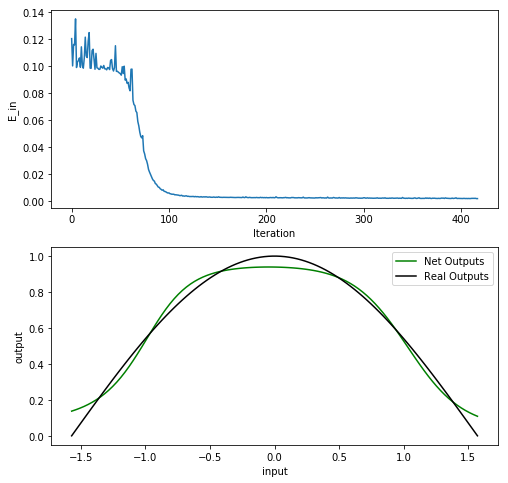

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

u.plotE_ins(E_ins, axis=ax[0])

ax[1].plot(np.sum(inputs, axis=1), [model.calculate(i) for i in inputs], color='g', label='Net Outputs')
ax[1].plot(np.sum(inputs, axis=1), outputs, color='k', label='Real Outputs')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output')
ax[1].legend()

fig.show()

In [9]:
inputs = np.random.uniform(-np.pi, np.pi, 20)
inputs = np.vstack((inputs / 3, inputs * 2 / 3)).T
outputs = testFunc(inputs[:, 0], inputs[:, 1])

outputs2 = np.array([model.calculate(i) for i in inputs])
outputs2 - outputs

array([ 0.02239546,  0.94853358,  1.06031316,  0.24389709,  0.46205528,
        0.01811783, -0.03724734,  0.05026809,  1.05834711,  0.0082985 ,
        0.43472719, -0.00845329,  0.85658664,  0.84500026,  1.01422699,
        0.69113125,  0.14358506,  0.673939  ,  0.93269137,  0.06778555])

## MNIST